# **Projet NLP: Classification IA and Human Texts**

<ins>Group :</ins>
- Thomas Sinapi
- Pierre Derathe
- Manitas Bahri

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint
from nltk.tokenize import word_tokenize, RegexpTokenizer
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
df = pd.read_csv("data.csv")
X_total, y_total = df["text"], df["generated"].astype("int")

In [3]:
n = 2000

id_ai = (y_total == 1).values.nonzero()[0]
id_human = (y_total == 0).values.nonzero()[0][:len(id_ai)]

X_human = X_total.iloc[id_human][:n]
X_ai = X_total.iloc[id_ai][:n]

y_human = y_total.iloc[id_human][:n]
y_ai = y_total.iloc[id_ai][:n]

X = pd.concat([X_human, X_ai])
y = pd.concat([y_human, y_ai])

In [4]:
# Putting the sample data in a csv file for easy access
training = pd.DataFrame({'text': X, 'generated': y})

# Specify the file path where you want to save the CSV file
csv_file_path = 'training.csv'

# Save the DataFrame to a CSV file
# training.to_csv(csv_file_path)

print(f"DataFrame saved to {csv_file_path}")

DataFrame saved to training.csv


## **1. <ins>Data Analysing</ins>**

In [7]:
print("Human Text")
pprint(X[y == 0].iloc[11])

Human Text
('"When I had a car I was always tense. I\'m much happier this way." Heidrun '
 'Walter source 1. For many years, people have depended on cars to take them '
 'places and allow them to live a normal life. However, the recent decline in '
 'driving and car sales has proven that there are many advantages to limiting '
 'car usage. Limiting car usage would help reduce the greenhouse effect, would '
 'help reduce smog and other lowair pollution, as well as helping promote '
 'aspects of the eeconomy which differ from purely car sales and '
 'transportation.\n'
 '\n'
 'To begin with, the greenhouse effect, a large part of which is caused by '
 'cars and their emissions, is endangering not only our environments and '
 'ecosystems, but also life as we know it. According to source 1 In german '
 'Suburb, Life Goes On Without Cars, passengers car are the cause of 12% of '
 'greenhouse gas emissions in Europe and also responsible for approximately '
 '50% of emissions in certain parts

In [8]:
print("AI Text")
pprint(X[y == 1].iloc[0])

AI Text
('This essay will analyze, discuss and prove one reason in favor of keeping '
 'the Electoral College in the United States for its presidential elections. '
 'One of the reasons to keep the electoral college is that it is better for '
 'smaller, more rural states to have more influence as opposed to larger '
 'metropolitan areas that have large populations. The electors from these '
 'states are granted two votes each. Those from larger, more populated areas '
 'are granted just one vote each. Smaller states tend to hold significant '
 'power because their two votes for president and vice president add up more '
 'than the votes of larger states that have many electors. This is because of '
 'the split of the electoral votes. Some argue that electors are not bound to '
 'vote for the candidate who won the most votes nationally. They do not have '
 "to vote for their own state's nominee unless their state has a winner take "
 'all system. However, there are states that have adop

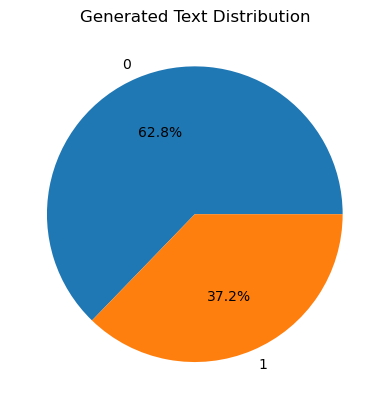

In [9]:
# Plot the distribution of the generated text
plt.pie(y_total.value_counts(), labels=y_total.value_counts().index, autopct='%1.1f%%')
plt.title("Generated Text Distribution")
plt.show()

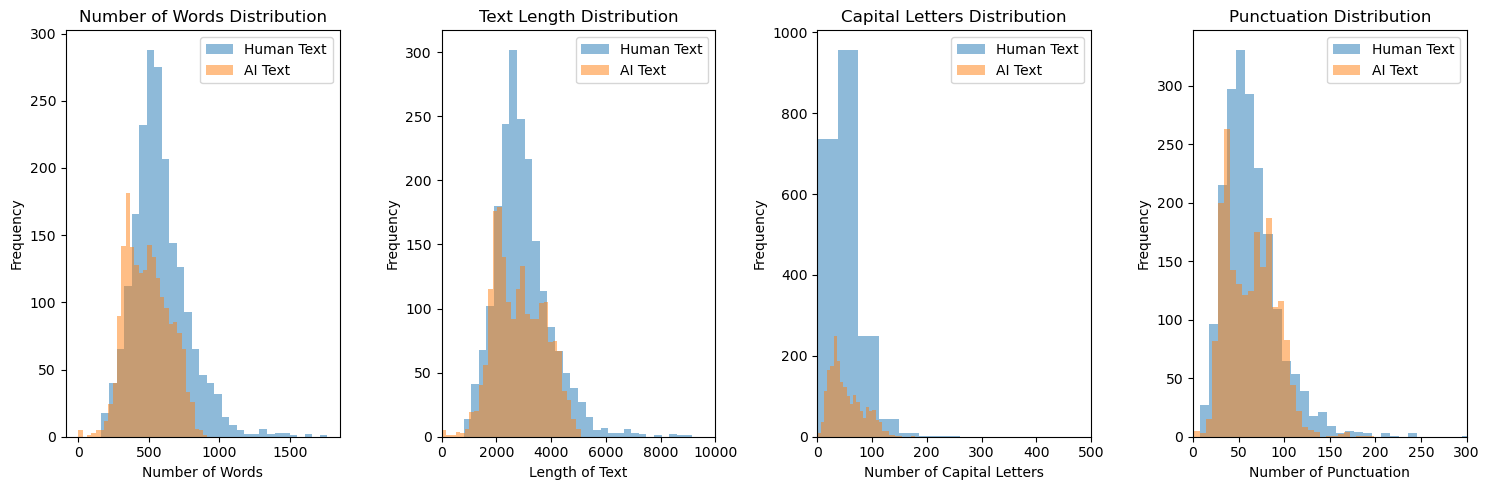

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# Plot the distribution of the number of words by class
ax[0].hist(X[y == 0].apply(word_tokenize).str.len(), bins=30, alpha=0.5, label="Human Text")
ax[0].hist(X[y == 1].apply(word_tokenize).str.len(), bins=30, alpha=0.5, label="AI Text")
ax[0].set_title("Number of Words Distribution")
ax[0].set_xlabel("Number of Words")
ax[0].set_ylabel("Frequency")
ax[0].legend()
# ax[0].set_xlim(0, 1000)

# Plot the distribution of the text length by class
ax[1].hist(X[y == 0].str.len(), bins=30, alpha=0.5, label="Human Text")
ax[1].hist(X[y == 1].str.len(), bins=30, alpha=0.5, label="AI Text")
ax[1].set_title("Text Length Distribution")
ax[1].set_xlabel("Length of Text")
ax[1].set_ylabel("Frequency")
ax[1].legend()
ax[1].set_xlim(0, 10000)

# Plot the distribution of the capital letters by class
count_upper_g = X.str.findall(r"[A-Z]").str.len().groupby(y)
ax[2].hist(count_upper_g.get_group(0), bins=30, alpha=0.5, label="Human Text")
ax[2].hist(count_upper_g.get_group(1), bins=30, alpha=0.5, label="AI Text")
ax[2].set_title("Capital Letters Distribution")
ax[2].set_xlabel("Number of Capital Letters")
ax[2].set_ylabel("Frequency")
ax[2].legend()
ax[2].set_xlim(0, 500)

# Plot the distribution of the punctuation by class
count_punct_g = X.str.findall(r"[^\w\s]").str.len().groupby(y)
ax[3].hist(count_punct_g.get_group(0), bins=30, alpha=0.5, label="Human Text")
ax[3].hist(count_punct_g.get_group(1), bins=30, alpha=0.5, label="AI Text")
ax[3].set_title("Punctuation Distribution")
ax[3].set_xlabel("Number of Punctuation")
ax[3].set_ylabel("Frequency")
ax[3].legend()
ax[3].set_xlim(0, 300)

plt.tight_layout()
plt.show()

## **Wordcloud for AI and human Content**

In [ ]:
def create_wordcloud(data, column, title):
    # Specify a Bangla-supported font, such as "Siyam Rupali"



    #This setting disables the detection of collocations (multi-word phrases) to focus on individual words.
    wordcloud = WordCloud(width=800, height=400, background_color='black', #black
                          colormap='YlGnBu_r', collocations=False).generate(' '.join(data[column]))

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {column} in {title}', fontsize=16, color='black')
    plt.axis('off')
    plt.show()

In [ ]:
create_wordcloud(X_ai, 'text', 'Generated by AI Content')

In [ ]:
create_wordcloud(X_human, 'text', 'Human Content')